In [5]:
import numpy as np
from Backtesting.staticdata.options.tertiary_patterns.context import TertiaryController
import matplotlib.pyplot as plt
tw = TertiaryController()
tw.load_gbm(372530)

array([100.01876902, 100.09603161, 100.49426306, ...,  73.21383318,
        73.05912726,  72.91171559])

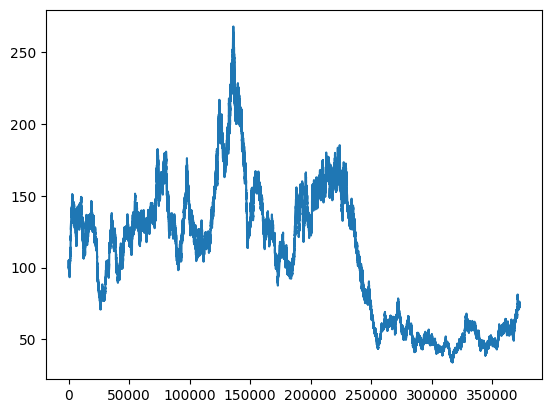

In [6]:
plt.plot(tw.raw_m1_csv)

In [146]:
g = np.random.normal(size=10000)
g

array([ 1.76872106, -1.54493042, -0.06429507, ..., -1.090875  ,
       -0.85214965, -0.76269024])

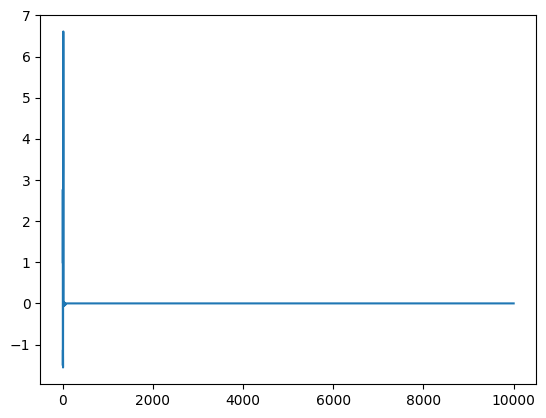

In [147]:
plt.plot(np.cumprod(np.insert(g + 1, 0, 1)))

In [139]:

import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

start = dt.datetime(2011, 1, 1)
end = dt.datetime(2021, 1, 1)
stock_data = yf.download('MSFT', start, end)

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

In [ ]:

T = 252
count = 0
price_list = []
last_price = stock_data['Adj Close'][-1]

price = last_price * (1 + np.random.normal(0, daily_vol))
price_list.append(price)

for y in range(T):
    if count == 251:
        break
    price = price_list[count]* (1 + np.random.normal(0, daily_vol))
    price_list.append(price)
    count += 1

plt.plot(price_list)
plt.show()

In [ ]:
import scipy
def GBMsimulatorUniVar(So, mu, sigma, T, N):
    dim = np.size(So)
    #t = np.linspace(0., T, int(N))
    S = np.zeros([T + 1, int(N)])
    S[0, :] = So
    for t in range(1, int(T) + 1):
        for i in range(0, int(N)):    
            drift = (mu - 0.5 * sigma**2)
            Z = scipy.stats.gennorm.rvs(beta = 1.126689300086524*2.5)
            diffusion = sigma*Z
            S[t][i] = S[t - 1][i]*np.exp(drift + diffusion)
    return S[1:]#, t